In [1]:
import yfinance
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import datetime

### 1. Use yfinance Yahoo API to load past 2-year hourly data. Note: equity market opens at 9:30 am and closes at 4 pm. Interest rate and commodity market open earlier. Need to discard some data and concat them separately.

In [17]:
dic_ticker_equity={'nadq_comp':'^ixic','sp500':'^gspc','rus2000':'^rut', 'VIX':'^vix'}
dic_ticker_rate={'10yr_yield':'^tnx','5yr_yield':'^FVX'}
dic_ticker_commodity={'oil':'CL=F','gold':'GC=F','Dollar':'DX=F'}

###### 1.1 Equity Data

In [46]:
# Equity price

start_date1=datetime.date.today()-datetime.timedelta(days=729) # Yahoo API allows maximum 2-year hourly data

ticker0='^ndx' 
df_ticker0=yfinance.Ticker(ticker0)
df_close1=df_ticker0.history(interval='1h',
                            start=start_date1,end=datetime.date.today())[['Close']] # only pick the price at market close
df_close1.columns=['nadq100']
ticker_names=['nadq100']
for ticker_name, ticker in dic_ticker_equity.items():
    df_info=yfinance.Ticker(ticker)
    df_close_i=df_info.history(interval='1h',
                            start=start_date1,end=datetime.date.today())[['Close']] #nasdaq only start in 1985-10-01
    df_close1=pd.concat([df_close1,df_close_i],axis=1,join='outer') # join inner to discard the weekend data (no weekend data except bitcoin)
    ticker_names.append(ticker_name)
    df_close1.columns=ticker_names
    
    
# create an equity dataframe
df_equity=df_close1.copy()
df_equity.isnull().describe() # check if any NA data

,nadq100,nadq_comp,sp500,rus2000,VIX
count,3505,3505,3505,3505,3505
unique,1,1,1,2,1
top,False,False,False,False,False
freq,3505,3505,3505,3504,3505


In [47]:
# get only the not null value and assign back to the data frame
for col in df_equity.columns:
    df_equity=df_equity[df_equity[col].notnull()]

In [48]:
df_equity.isnull().describe()

,nadq100,nadq_comp,sp500,rus2000,VIX
count,3504,3504,3504,3504,3504
unique,1,1,1,1,1
top,False,False,False,False,False
freq,3504,3504,3504,3504,3504


In [51]:
df_equity.index=np.arange(df_equity.shape[0],dtype=np.int16)
# reset the index (actual time stamp not used in ML)

###### 1.2 Treasury yied data

In [52]:
# treasury yield data

ticker0='^TYX' # 30yr treasury yield
df_ticker0=yfinance.Ticker(ticker0)
df_close2=df_ticker0.history(interval='1h',
                            start=start_date1,end=datetime.date.today())[['Close']] # only pick the price at market close
df_close2.columns=['30yr_yield']
ticker_names=['30yr_yield']
for ticker_name, ticker in dic_ticker_rate.items():
    df_info=yfinance.Ticker(ticker)
    df_close_i=df_info.history(interval='1h',
                            start=start_date1,end=datetime.date.today())[['Close']] #nasdaq only start in 1985-10-01
    df_close2=pd.concat([df_close2,df_close_i],axis=1,join='outer') # join inner to discard the weekend data (no weekend data except bitcoin)
    ticker_names.append(ticker_name)
    df_close2.columns=ticker_names
    
df_yield=df_close2.copy()

In [53]:
df_yield.isnull().describe()

,30yr_yield,10yr_yield,5yr_yield
count,3511,3511,3511
unique,2,2,2
top,False,False,False
freq,3509,3509,3510


In [54]:
# get only the not null value and assign back to the data frame
for col in df_yield.columns:
    df_yield=df_yield[df_yield[col].notnull()]

In [55]:
df_yield.isnull().describe()

,30yr_yield,10yr_yield,5yr_yield
count,3508,3508,3508
unique,1,1,1
top,False,False,False
freq,3508,3508,3508


In [56]:
df_yield.index=np.arange(df_yield.shape[0],dtype=np.int16)

In [57]:
df_yield.head()

,30yr_yield,10yr_yield,5yr_yield
0,1.348,0.640,0.272
1,1.345,0.636,0.271
2,1.329,0.625,0.264
3,1.348,0.644,0.279
4,1.353,0.648,0.279


###### 1.3 Commodity data

In [62]:
ticker0='HG=F' # copper
df_ticker0=yfinance.Ticker(ticker0)
df_close3=df_ticker0.history(interval='1h',
                            start=start_date1,end=datetime.date.today())[['Close']] # only pick the price at market close
df_close3.columns=['copper']
ticker_names=['copper']
for ticker_name, ticker in dic_ticker_commodity.items():
    df_info=yfinance.Ticker(ticker)
    df_close_i=df_info.history(interval='1h',
                            start=start_date1,end=datetime.date.today())[['Close']] #nasdaq only start in 1985-10-01
    df_close3=pd.concat([df_close3,df_close_i],axis=1,join='outer') # join inner to discard the weekend data (no weekend data except bitcoin)
    ticker_names.append(ticker_name)
    df_close3.columns=ticker_names
df_commodity=df_close3.copy()
df_commodity.isnull().describe()

,copper,oil,gold,Dollar
count,11609,11609,11609,11609
unique,2,2,2,2
top,False,False,False,False
freq,11594,11345,11593,10789


In [63]:
# get only the not null value and assign back to the data frame
for col in df_commodity.columns:
    df_commodity=df_commodity[df_commodity[col].notnull()]

In [64]:
df_commodity.isnull().describe()

,copper,oil,gold,Dollar
count,10574,10574,10574,10574
unique,1,1,1,1
top,False,False,False,False
freq,10574,10574,10574,10574


In [65]:
df_commodity.head(20)

,copper,oil,gold,Dollar
2020-08-23 18:00:00-04:00,2.9330,42.480000,1944.900024,93.180000
2020-08-23 19:00:00-04:00,2.9270,42.430000,1942.500000,93.199997
2020-08-23 20:00:00-04:00,2.9285,42.439999,1942.699951,93.214996
2020-08-23 21:00:00-04:00,2.9340,42.439999,1942.699951,93.160004
2020-08-23 22:00:00-04:00,2.9310,42.340000,1942.800049,93.230003
2020-08-23 23:00:00-04:00,2.9330,42.310001,1939.800049,93.250000
2020-08-24 00:00:00-04:00,2.9335,42.279999,1940.300049,93.220001
2020-08-24 01:00:00-04:00,2.9410,42.389999,1940.900024,93.150002
2020-08-24 02:00:00-04:00,2.9445,42.410000,1941.800049,93.129997
2020-08-24 03:00:00-04:00,2.9550,42.619999,1952.000000,93.084999


###### Note: Commodity market starts open 24 hrs 5 days. Need to remove those data before 9:30 am and after 4 pm to match equity data length

In [66]:
index_series=df_commodity.index.to_series()
time_mapped=index_series.map(lambda x:x.time()) # Get the time only (remove the data).

Logic_vector=(time_mapped < datetime.time(16)) & (time_mapped > datetime.time(8)) # keep data between 9 am and 4 pm
df_commodity=df_commodity[Logic_vector]

In [69]:
df_commodity.index=np.arange(df_commodity.shape[0],dtype=np.int16) 
# reset the index with integer numbers

###### 1.4 Concat all three data sets. Note the data sets have different lengths. The reason is the equity market closes at some holidays, while other markets (treasury and commodity) remain open. Those data can be discarded to match equity data length for the later ML modeling

In [77]:
# concat the equity and yield data

df_hourly_data=pd.concat([df_equity,df_yield],axis=1,join='outer')

In [78]:
df_hourly_data.isnull().describe()

,nadq100,nadq_comp,sp500,rus2000,VIX,30yr_yield,10yr_yield,5yr_yield
count,3508,3508,3508,3508,3508,3508,3508,3508
unique,2,2,2,2,2,1,1,1
top,False,False,False,False,False,False,False,False
freq,3504,3504,3504,3504,3504,3508,3508,3508


In [79]:
# get only the not null value and assign back to the data frame
for col in df_hourly_data.columns:
    df_hourly_data=df_hourly_data[df_hourly_data[col].notnull()]

In [80]:
df_hourly_data.isnull().describe()

,nadq100,nadq_comp,sp500,rus2000,VIX,30yr_yield,10yr_yield,5yr_yield
count,3504,3504,3504,3504,3504,3504,3504,3504
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,3504,3504,3504,3504,3504,3504,3504,3504


In [81]:
# Concat equity, yield data and commodity data

df_hourly_data=pd.concat([df_hourly_data,df_commodity],axis=1,join='outer')

In [82]:
df_hourly_data.isnull().describe()

,nadq100,nadq_comp,sp500,rus2000,VIX,30yr_yield,10yr_yield,5yr_yield,copper,oil,gold,Dollar
count,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507,3507
unique,2,2,2,2,2,2,2,2,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,3504,3504,3504,3504,3504,3504,3504,3504,3507,3507,3507,3507


In [83]:
# get only the not null value and assign back to the data frame
for col in df_hourly_data.columns:
    df_hourly_data=df_hourly_data[df_hourly_data[col].notnull()]

In [84]:
df_hourly_data.isnull().describe()

,nadq100,nadq_comp,sp500,rus2000,VIX,30yr_yield,10yr_yield,5yr_yield,copper,oil,gold,Dollar
count,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False
freq,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


In [86]:
df_hourly_data.to_csv('stock_2yr1hr_822.csv')

### 2. Data processing, visualization and normalization

In [87]:
stock_data_Hour=pd.read_csv('stock_2yr1hr_822.csv')

In [88]:
stock_data_Hour.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

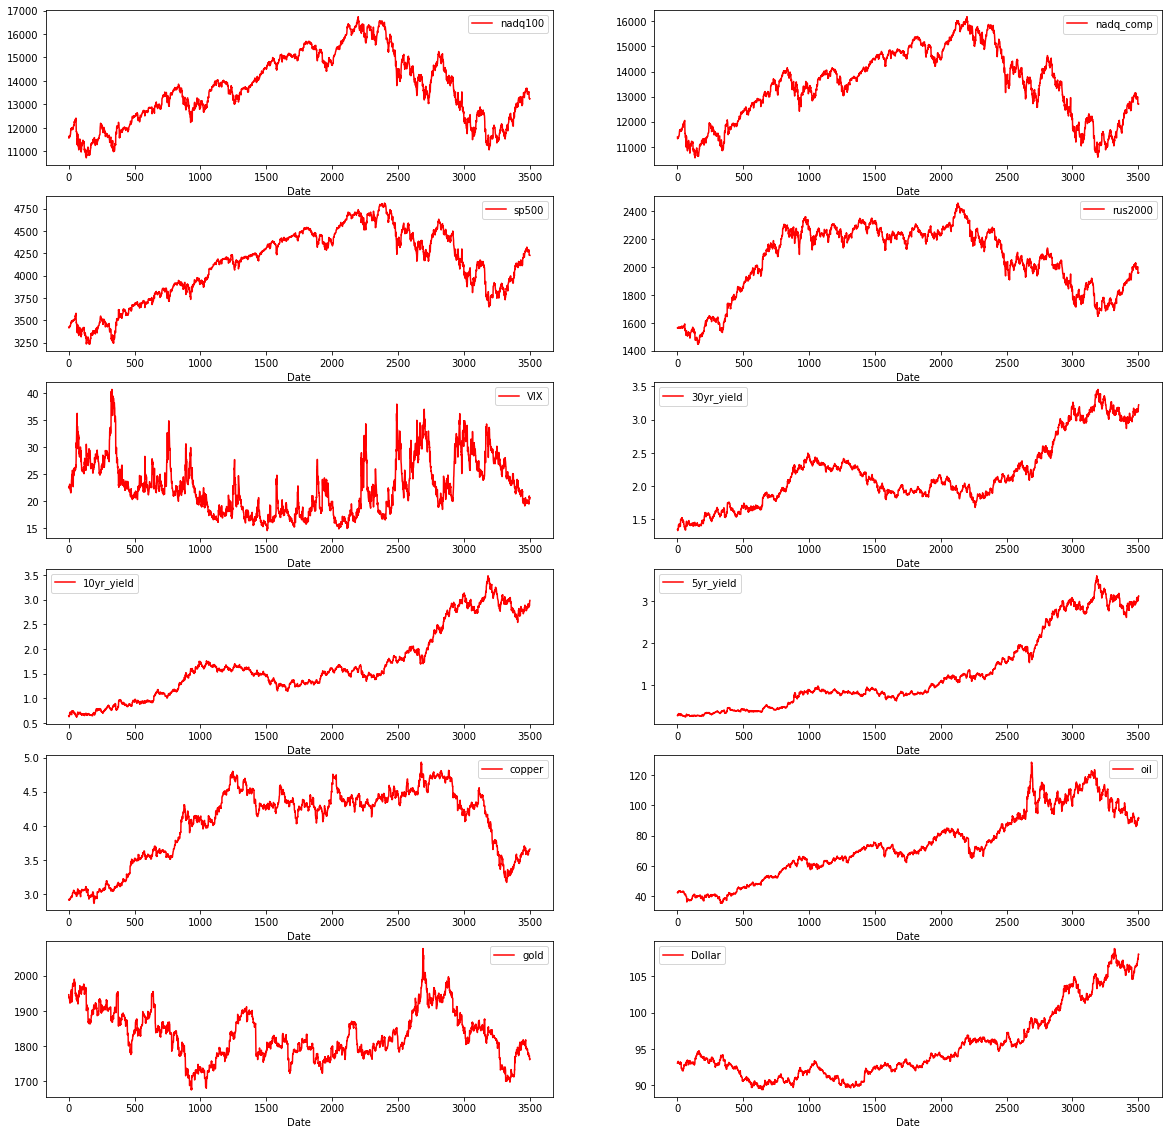

In [90]:
nr=stock_data_Hour.shape[0]
nc=stock_data_Hour.shape[1]
fig3=plt.figure(3,figsize=(20,20))
stock_plot=stock_data_Hour.iloc[:nr,:]
for i in range(1,nc):
    ax_i=fig3.add_subplot(6,2,i)
    stock_plot.plot(x='Date',y=i,ax=ax_i,kind='line',color='r')  # y can be either label (str) or location number

In [92]:
stock_2yrHr=stock_data_Hour.copy()
stock_2yrHr.head()

,Date,nadq100,nadq_comp,sp500,rus2000,VIX,30yr_yield,10yr_yield,5yr_yield,copper,oil,gold,Dollar
0,0,11636.800781,11390.080078,3423.639893,1563.595215,22.639999,1.348,0.640,0.272,2.9260,42.419998,1945.900024,93.055000
1,1,11564.858398,11324.952148,3417.050049,1562.648315,22.770000,1.345,0.636,0.271,2.9160,42.570000,1937.300049,93.154999
2,2,11616.868164,11366.683594,3419.770020,1562.921143,22.600000,1.329,0.625,0.264,2.9245,42.570000,1937.699951,93.209999
3,3,11613.037109,11365.061523,3420.750000,1561.866699,22.459999,1.348,0.644,0.279,2.9265,42.380001,1938.300049,93.239998
4,4,11596.833008,11350.250977,3420.320068,1560.843384,22.549999,1.353,0.648,0.279,2.9265,42.619999,1935.800049,93.264999


In [95]:
# drop nadq and rus index. This case will only train and predict sp500 
stock_2yrHr.drop(columns=['Date','nadq_comp','nadq100','rus2000'],inplace=True)

In [99]:
stock_2yrHr.isnull().describe()

,sp500,VIX,30yr_yield,10yr_yield,5yr_yield,copper,oil,gold,Dollar
count,3504,3504,3504,3504,3504,3504,3504,3504,3504
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,3504,3504,3504,3504,3504,3504,3504,3504,3504


###### 2.1 Data Split and Normalization

In [100]:
n1=stock_2yrHr.shape[0]
df_train60=stock_2yrHr.iloc[:int(0.7*n1),:].copy()
df_val60=stock_2yrHr.iloc[int(0.7*n1):int(0.9*n1)].copy() # may not need to use ':' 
df_test60=stock_2yrHr.iloc[int(0.9*n1):].copy()

In [101]:
train_mean60=df_train60.mean(axis=0)  # axis=0: mean calculated over the rows for each column
train_std60=df_train60.std(axis=0) 

df_train60= (df_train60-train_mean60) / train_std60 # pandas will broadcast the scaler to each matrix element
df_val60 = (df_val60-train_mean60) / train_std60
df_test60 = (df_test60-train_mean60) / train_std60

### !! Note: we used stock_10yrD.iloc[:int(0.7*n1),:].copy() to make the df_train referenced to a copied object. 
### so this operation won't change the original object

### 3. Time Sequence Window and Dataset

In [102]:
class window_generator_R60():
        
    def __init__(self,input_width, label_width, shift,
               df_train=df_train60, df_val=df_val60, df_test=df_test60,
               label_columns=None):
        
        if (label_columns is not None) and (not isinstance(label_columns,list)):
            sys.exit('label_columns is not a list')
            
                      
        self.df_train=df_train
        self.df_val=df_val
        self.df_test=df_test
        
        # defining column names vs location id
        
        self.label_columns=label_columns
        
        self.ColumnID={name:i for i, name in enumerate(self.df_train.columns)}
        
                    
        # create some self attributes
        
        # total window width
        self.window_size=input_width+shift # the label slice counts backward by label_width
        # this window width is the width that the input dataset is truncated to
        # the window width is passed to tf.keras.utils.timeseries_dataset_from_array to get the dataset 
        self.input_width=input_width
        self.label_width=label_width
        self.shift=shift
        
        # input slice 
        input_start=0
        input_stop = input_start + input_width
        self.input_slice = slice(input_start,input_stop,1) # create a slice object that will be used later in windlow split
                
        # label slice
        self.label_stop = input_start + self.window_size # indexing stop at label_stop -1
        self.label_start = self.label_stop - label_width
        # the above two have self. as they will be used in other methods
        self.label_slice=slice(self.label_start,self.label_stop,1)
        
        # input and label range indices for window information purpose
        window_indices=np.arange(input_start,self.label_stop,1)
        self.input_indice=window_indices[self.input_slice]
        self.label_indice=window_indices[self.label_slice]
        
    def __repr__(self):
        
        return '\n'.join([
            f'Total window size: {self.window_size}',
            f'Input indices: {self.input_indice}',
            f'Label indices: {self.label_indice}',
            f'Label column name(s): {self.label_columns}'])
        

In [103]:
class window_split_R60(window_generator_R60):
    
    def dataset_split(self,features):
                
        # features is a (batch,time,feature) dataset tensor
        
        input_batch=features[:,self.input_slice,:]
        label_batch=features[:,self.label_slice,:]
        
        if self.label_columns is not None:
           # self.feature_list=[self.label_columnID[name] for name in self.label_columns]
           # self.yy=self.yy[:,:,self.feature_list]
       # NOTE: the above two lines won't work as the tensor won't take a list as an indice. 
       # have to pull out the tensor one by one, and use tf.stack to stack them back up
            y_new=[label_batch[:,:,self.ColumnID[name]] for name in self.label_columns]
            label_batch=tf.stack(y_new,axis=-1)
        
             
        return (input_batch,label_batch)
    
    def make_dataset(self,data_input): # create dataset batches of the input time series array
        
        dataset_sq=tf.keras.preprocessing.timeseries_dataset_from_array(data=data_input,
                                                             targets=None,
                                                             sequence_length=self.window_size,  # window size to divide the sequences
                                                             batch_size=16, # change this from 32 to see how it affects training. we don't have much data input
                                                             shuffle=True) # Shuffle returns better results
        
        result=dataset_sq.map(self.dataset_split) # use another reference to the mapped results
        
        return result
    
    @property
    def ds_train(self):
        
        return self.make_dataset(self.df_train)
    
    @property
    def ds_val(self):
        
        return self.make_dataset(self.df_val)
    
    @property
    def ds_test(self):
        
        return self.make_dataset(self.df_test)
    

In [104]:
def plot_result_convertR60(window,model=None, cond='train',plot_col='nadq100', sub_start=0,sub_end=5,n_batch=16):
    
    if cond=='train':
        ds_input=window.ds_train
    elif cond=='val':
        ds_input=window.ds_val
    else:
        ds_input=window.ds_test
   
    

    if window.label_columns is not None:
        
        window.label_columnID={name:i for i, name in enumerate(window.label_columns)}
            
            
    nrd=random.randint(0,n_batch)
    for i,x in enumerate(ds_input):
        if i==nrd:
            rnd_example=x  # a tuple of input and label. 32 batches in one tuple
            break
    
       
    
    inputs, labels = rnd_example 
    
    #===================
    input_col_index = window.ColumnID[plot_col]
    if window.label_columns:
        label_col_index=window.label_columnID[plot_col]
    else:
        label_col_index=input_col_index
        
       # max_n = min(max_subplots, len(inputs))
    #===================
    max_n=sub_end-sub_start
    
    #=====================
    # create X indices for plot
    n_input=inputs.shape[1]
    n_label=labels.shape[1]
    # n_data=n_input+n_label : This is wrong. total data length is not n_input+n_label; Use window.window_size here
    n_data=window.window_size # total data length is window size
    ind_plotX=np.arange(0,n_data,1)
    n_labelStart=n_data-labels.shape[1] # start indice for label plot
 #   print(n_labelStart,labels.shape[1],n_data,n_label,n_input)
    #====================
    
    fig1=plt.figure(figsize=(20,28))
    
    for n in range(0,max_n):
        
        nk=n+sub_start
        ax=fig1.add_subplot(max_n, 1, n+1)
        
        ax.set_ylabel(f'{plot_col} [normed]')
   #         print('nk=',nk)
        
        y_convert=inputs[nk, :, input_col_index]*train_std60[input_col_index]+train_mean60[input_col_index]
        
        ax.plot(ind_plotX[:n_input], y_convert,
                     label='Inputs', marker='.', zorder=-10)


        y_convertL=labels[nk, :, label_col_index]*train_std60[input_col_index]+train_mean60[input_col_index]       

        ax.scatter(ind_plotX[n_labelStart:], y_convertL,
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
            
        if model is not None:
            predictions = model(inputs)
            
            y_convert_PL=predictions[nk, :, label_col_index]*train_std60[input_col_index]+train_mean60[input_col_index] 
            ax.scatter(ind_plotX[n_labelStart:], y_convert_PL,
                            marker='X', edgecolors='k', label='Predictions',c='#ff7f0e', s=64)

        if n == 0:
            ax.legend()

    ax.set_xlabel('Time [D]')

### 4. Model Build and Fit

In [105]:
MAX_EPOCHS = 20

def compile_and_fit_R60(model, window, patience=5):
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(learning_rate=0.02),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.ds_train, epochs=MAX_EPOCHS,
                      validation_data=window.ds_val,
                      callbacks=[early_stopping])
    return history

#### 4.1 LSTM Model with Return_sequence=False and Multiple Outputs

##### 4.1.1 Select window size and create datasets

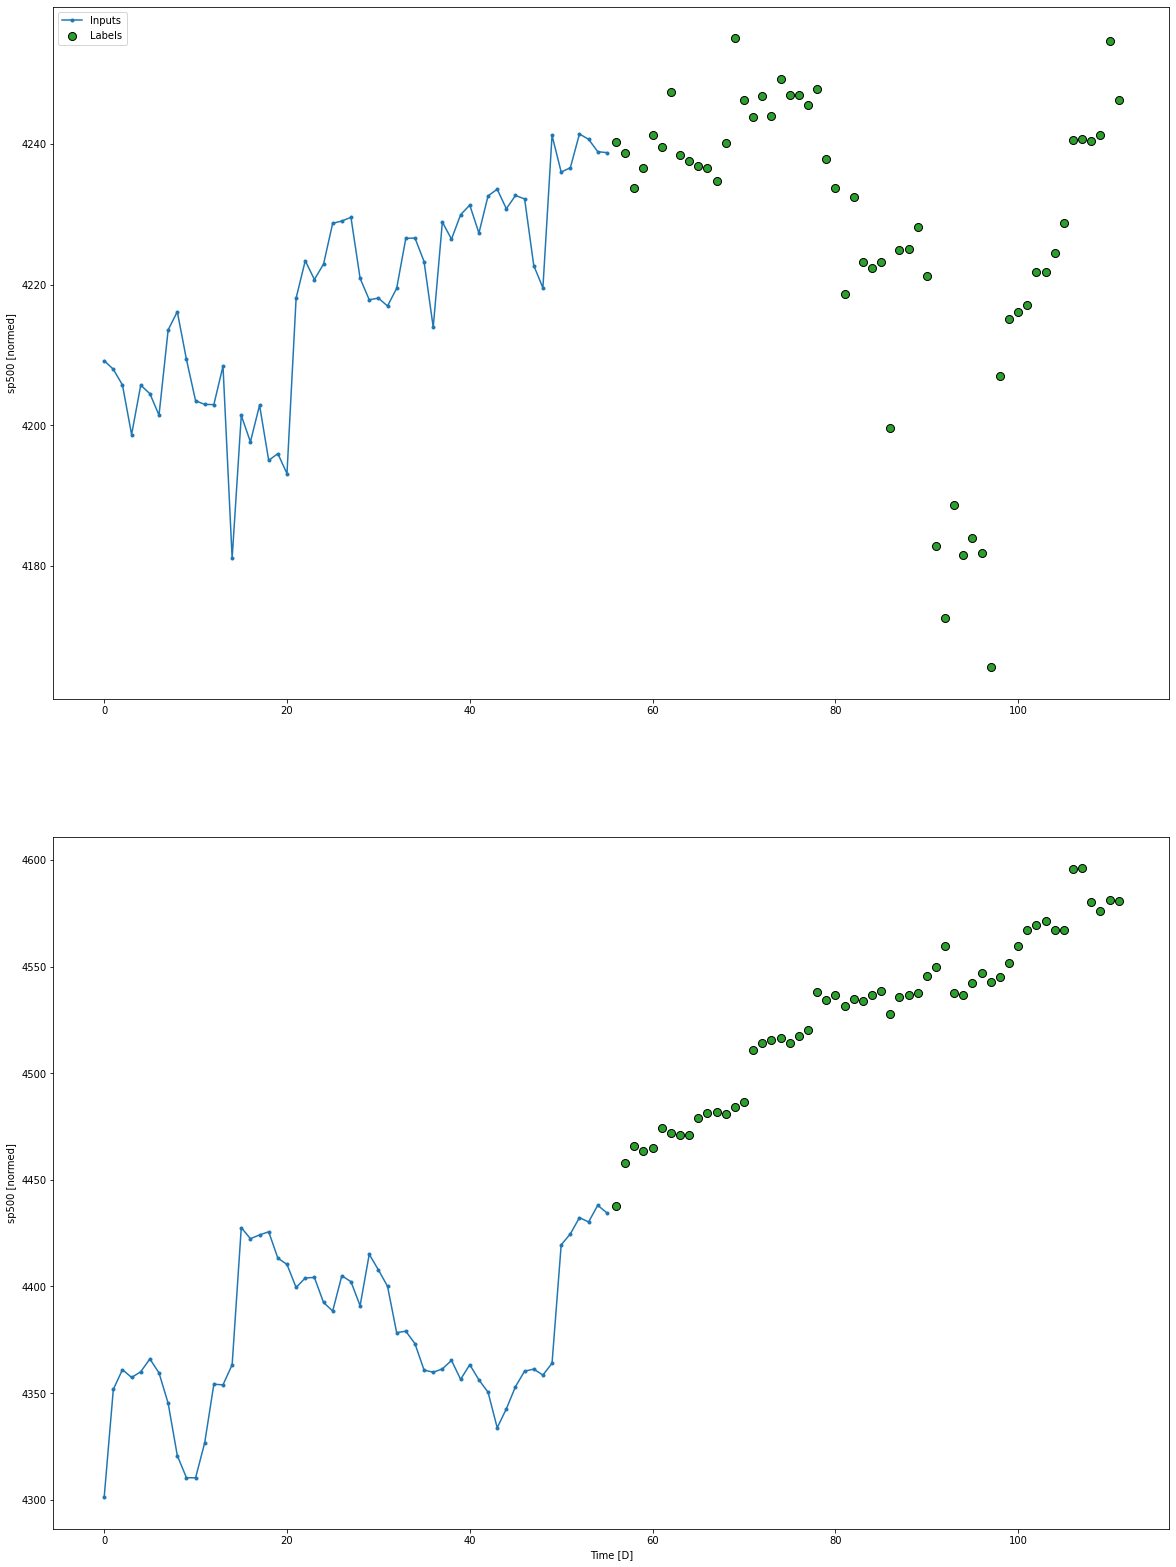

In [112]:
input_step=56
label_step=56
shift_step=56
wd_R6_01=window_split_R60(input_width=input_step, label_width=label_step, shift=shift_step,
                            df_train=df_train60,df_val=df_val60,df_test=df_test60,
                            label_columns=['sp500'])
plot_result_convertR60(wd_R6_01,plot_col='sp500',sub_start=0,sub_end=2) # in this window, we only have 8 batches each set

##### 4.1.2 Construct the LSTM Model using Subclass

In [113]:
num_label_feature=1

class lstm_model_R60(tf.keras.Model):
    
    def __init__(self, label_S):
        
        super(lstm_model_R60,self).__init__()
        
 #       self.flat=tf.keras.layers.Flatten()
 #       self.lstm01=tf.keras.layers.LSTM(128,return_sequences=True,kernel_initializer='glorot_normal')
        self.lstm02=tf.keras.layers.LSTM(128,return_sequences=False,kernel_initializer='glorot_normal')
        self.dense03=tf.keras.layers.Dense(label_S*num_label_feature,kernel_initializer=tf.initializers.zeros())
        self.reshape04=tf.keras.layers.Reshape([-1,1]) # only 1 feature is predicted. so the shape is (time,feature)
        
    def call(self,inputs):
        
   #     h1=self.flat(inputs)
    #    h1=self.lstm01(inputs)
        h1=self.lstm02(inputs)
        h1=self.dense03(h1)
        outp=self.reshape04(h1)
        
        return outp

In [114]:
print(label_step)
lstm_modelR6_01=lstm_model_R60(label_step)
histR60_01=compile_and_fit_R60(lstm_modelR6_01,wd_R6_01)

56
Epoch 1/20
147/147 [==============================] - 5s 25ms/step - loss: 0.1349 - mean_absolute_error: 0.2202 - val_loss: 0.5388 - val_mean_absolute_error: 0.6277
Epoch 2/20
147/147 [==============================] - 4s 24ms/step - loss: 0.0229 - mean_absolute_error: 0.1142 - val_loss: 0.5985 - val_mean_absolute_error: 0.6738
Epoch 3/20
147/147 [==============================] - 3s 22ms/step - loss: 0.0179 - mean_absolute_error: 0.0993 - val_loss: 0.5699 - val_mean_absolute_error: 0.6601
Epoch 4/20
147/147 [==============================] - 3s 21ms/step - loss: 0.0176 - mean_absolute_error: 0.0980 - val_loss: 0.4880 - val_mean_absolute_error: 0.5974
Epoch 5/20
147/147 [==============================] - 3s 21ms/step - loss: 0.0133 - mean_absolute_error: 0.0845 - val_loss: 0.5227 - val_mean_absolute_error: 0.6286
Epoch 6/20
147/147 [==============================] - 3s 21ms/step - loss: 0.0117 - mean_absolute_error: 0.0797 - val_loss: 0.4595 - val_mean_absolute_error: 0.5724
Epoch 7

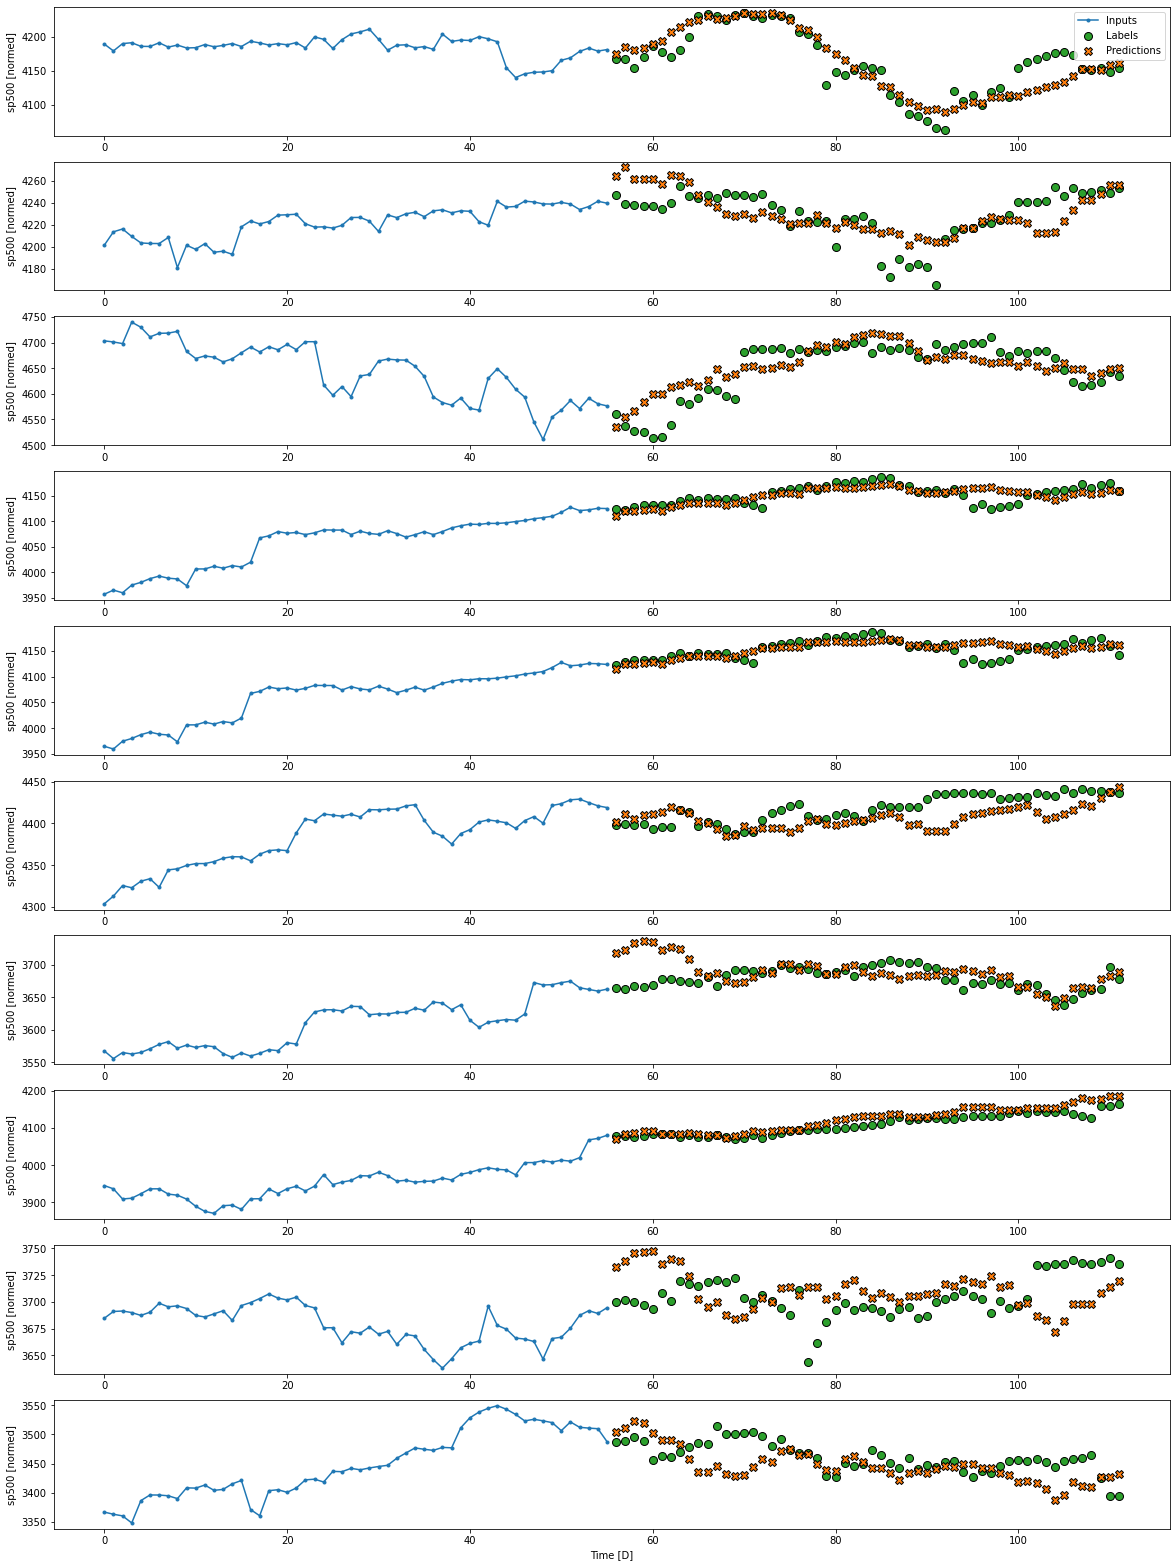

In [115]:
plot_result_convertR60(wd_R6_01,model=lstm_modelR6_01,plot_col='sp500',sub_start=6,sub_end=16)

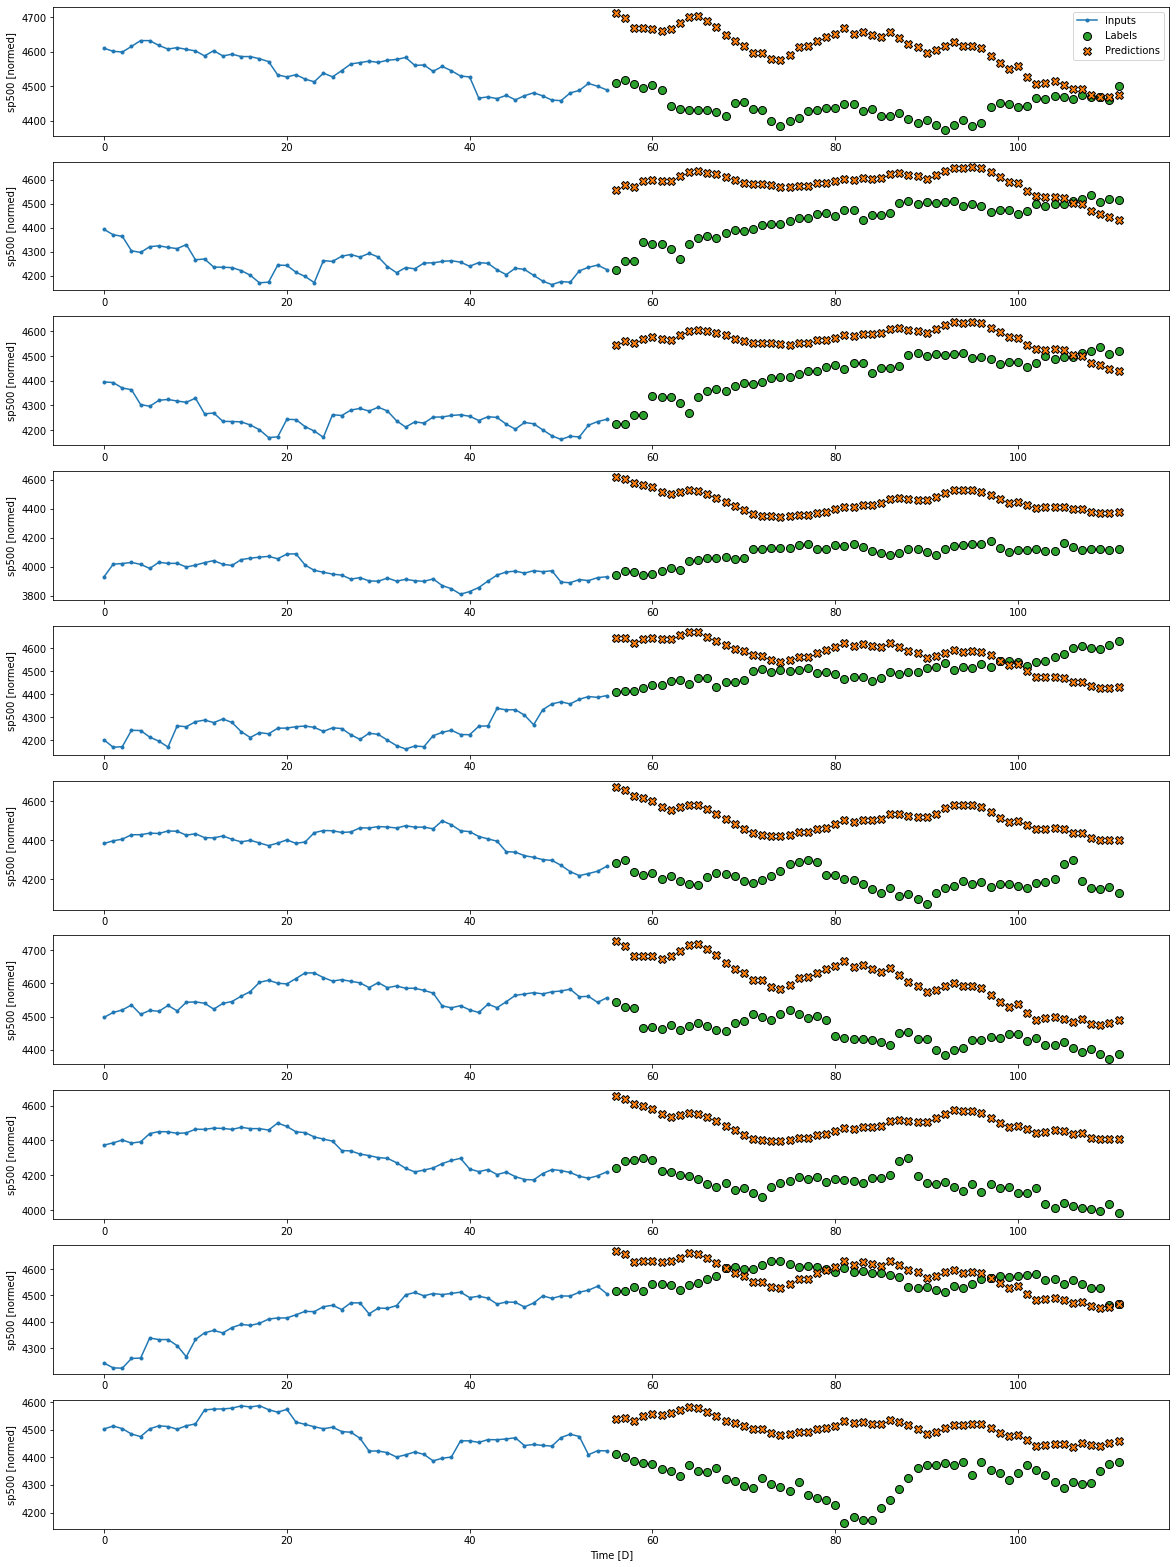

In [116]:
plot_result_convertR60(wd_R6_01,cond='val',model=lstm_modelR6_01,plot_col='sp500',sub_start=0,sub_end=10,n_batch=16)

#### The above results show the stock market is not well predicted by LSTM model. Even though the model fits the training data really well, it does not fit the validation/test data really well. The stock market simply has no trend. We may have to use other indicators to predict the market. It doesn't work well to use LSTM on the historical data of sp500, interest rate and commodity prices.